# Analysis of DANDI:001276 - Remote Targeting Electroporation Dataset

**NOTE: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Users should carefully verify all code and interpretations before use.**

This notebook demonstrates how to load and analyze data from DANDI:001276, which contains microscopy data investigating the impact of burst number variation on permeabilization distribution in confluent cell monolayers using CANCAN (with canceling pulses) electroporation protocols.

## Dataset Overview

This dataset examines cell membrane permeabilization patterns using a four-electrode array setup with:
- Inter-electrode distance: 10.0 mm
- Pulse duration: 600 ns
- Protocol: 9 packets of pulses at 0.2 MHz frequency
- Protocol repetition: 1, 2, 4, or 6 times at 1 Hz

The study uses two key fluorescent markers:
- Hoechst (DAPI channel): Stains all cell nuclei
- YoPro-1 (FITC channel): Indicates membrane permeabilization

## Required Packages

To run this notebook, you need the following Python packages:
- pynwb
- lindi
- numpy
- matplotlib

They can be installed using pip:
```bash
pip install pynwb lindi numpy matplotlib
```

In [1]:
# Import required libraries
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient

## Accessing the Dataset

First, let's get a list of all assets in the dataset using the DANDI API:

In [2]:
# Get list of all assets in the dataset
client = DandiAPIClient()
dandiset = client.get_dandiset("001276")
assets = list(dandiset.get_assets())

print(f"Total number of assets: {len(assets)}")
print("\nExample asset paths:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Total number of assets: 108

Example asset paths:
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb
- sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb
- sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb
- sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb


## Loading and Visualizing Image Data

Let's examine a pair of pre/post exposure images to visualize the cell staining patterns. We'll look at:
1. DAPI (Hoechst) staining showing cell nuclei
2. YoPro-1 staining indicating membrane permeabilization

For this example, we'll use images from subject P1_20240627_A2:

In [3]:
# Load pre-exposure image (DAPI)
pre_f = lindi.LindiH5pyFile.from_lindi_file(
    "https://lindi.neurosift.org/dandi/dandisets/001276/assets/95141d7a-82aa-4552-940a-1438a430a0d7/nwb.lindi.json"
)
pre_nwb = pynwb.NWBHDF5IO(file=pre_f, mode='r').read()

# Load post-exposure image (YoPro-1)
post_f = lindi.LindiH5pyFile.from_lindi_file(
    "https://lindi.neurosift.org/dandi/dandisets/001276/assets/d22476ad-fa18-4aa0-84bf-13fd0113a52c/nwb.lindi.json"
)
post_nwb = pynwb.NWBHDF5IO(file=post_f, mode='r').read()

# Print basic metadata
print("Pre-exposure image metadata:")
print(f"Subject ID: {pre_nwb.subject.subject_id}")
print(f"Image dimensions: {pre_nwb.acquisition['SingleTimePointImaging'].data[0].shape}")
print(f"\nSession description:\n{pre_nwb.session_description[:500]}...")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Pre-exposure image metadata:
Subject ID: P1_20240627_A2


Image dimensions: (19190, 19190)

Session description:
Acquisition Description (Subject-Specific): Subject ID: P1_20240627_A2, Fluorescent Channel: DAPI, Phase: pre (where 'pre' indicates imaging prior to exposure and 'post' indicates imaging of the same well after exposure).  CanCan protocol (with canceling pulses),011: Protocol consisted of 9 packets of pulses delivered at 0.2MHz frequency, protocol repeated 2 times at 1Hz frequency. General Protocol Description (Subject-Independent): Experiments were conducted using a four-electrode stainless ste...


### Visualizing Image Data

The images are quite large (19190 x 19190 pixels), so we'll examine a 1000 x 1000 pixel region from the center of each image:

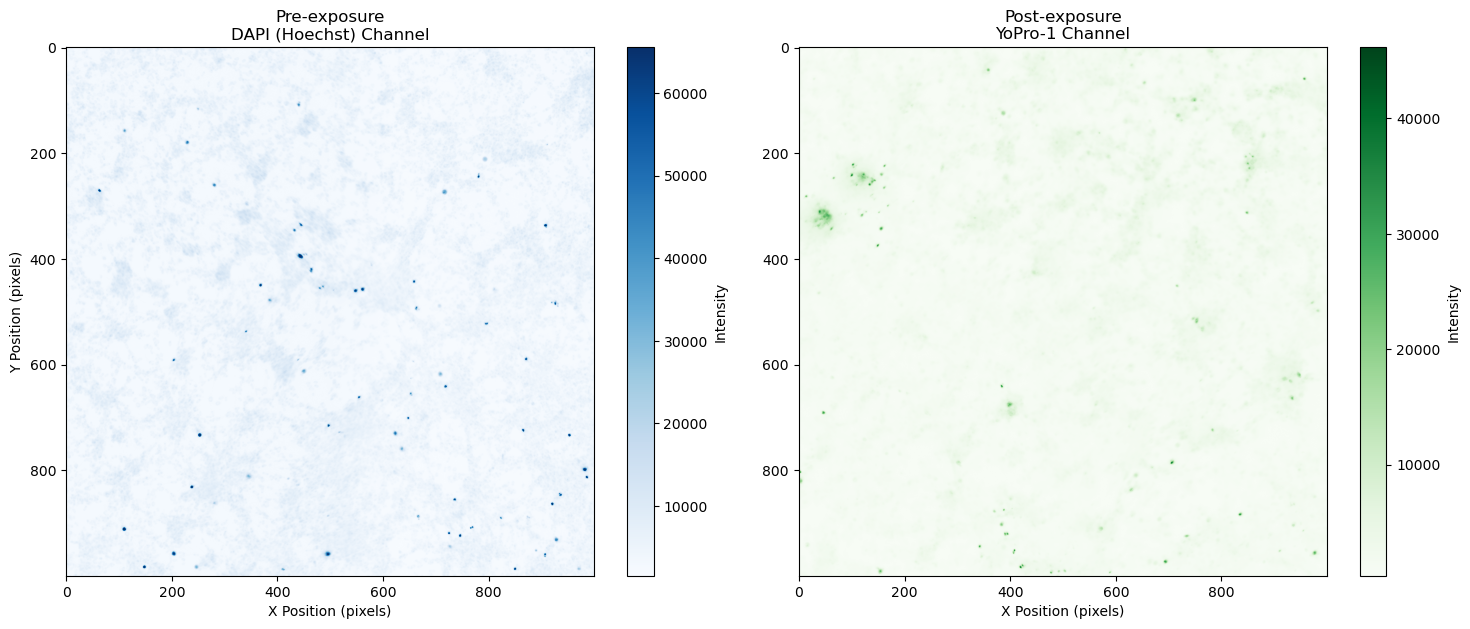


Image Statistics:

Pre-exposure (DAPI):
Mean intensity: 4152.63
Median intensity: 3693.00
Min/Max intensity: 1527.00 / 65535.00
Standard deviation: 2493.04

Post-exposure (YoPro-1):
Mean intensity: 1576.95
Median intensity: 1252.00
Min/Max intensity: 373.00 / 46156.00
Standard deviation: 1339.77


In [4]:
# Get image data
pre_image = pre_nwb.acquisition['SingleTimePointImaging'].data[0]
post_image = post_nwb.acquisition['SingleTimePointImaging'].data[0]

# Take center regions
center_x = pre_image.shape[0] // 2
center_y = pre_image.shape[1] // 2
subset_size = 1000

pre_subset = pre_image[
    center_x - subset_size//2:center_x + subset_size//2,
    center_y - subset_size//2:center_y + subset_size//2
]
post_subset = post_image[
    center_x - subset_size//2:center_x + subset_size//2,
    center_y - subset_size//2:center_y + subset_size//2
]

# Create figure with pre and post images side by side
plt.figure(figsize=(15, 6))

# Pre-exposure image
plt.subplot(1, 2, 1)
plt.imshow(pre_subset, cmap='Blues')
plt.colorbar(label='Intensity')
plt.title('Pre-exposure\nDAPI (Hoechst) Channel')
plt.xlabel('X Position (pixels)')
plt.ylabel('Y Position (pixels)')

# Post-exposure image
plt.subplot(1, 2, 2)
plt.imshow(post_subset, cmap='Greens')
plt.colorbar(label='Intensity')
plt.title('Post-exposure\nYoPro-1 Channel')
plt.xlabel('X Position (pixels)')

plt.tight_layout()
plt.show()

# Print basic statistics
print("\nImage Statistics:")
print("\nPre-exposure (DAPI):")
print(f"Mean intensity: {np.mean(pre_subset):.2f}")
print(f"Median intensity: {np.median(pre_subset):.2f}")
print(f"Min/Max intensity: {np.min(pre_subset):.2f} / {np.max(pre_subset):.2f}")
print(f"Standard deviation: {np.std(pre_subset):.2f}")

print("\nPost-exposure (YoPro-1):")
print(f"Mean intensity: {np.mean(post_subset):.2f}")
print(f"Median intensity: {np.median(post_subset):.2f}")
print(f"Min/Max intensity: {np.min(post_subset):.2f} / {np.max(post_subset):.2f}")
print(f"Standard deviation: {np.std(post_subset):.2f}")

### Key Observations

1. **DAPI (Hoechst) Channel**:
   - Shows distinct nuclear staining as bright spots
   - Relatively uniform distribution of nuclei across the field
   - Higher overall intensity range compared to YoPro-1

2. **YoPro-1 Channel**:
   - Indicates areas of membrane permeabilization
   - More clustered signal distribution
   - Lower overall intensity range

## Example Analyses

Here are some potential analyses researchers might want to perform with this dataset:

1. **Quantify Cell Distribution**:
   - Use intensity thresholding to identify and count nuclei
   - Analyze spatial distribution patterns

2. **Measure Permeabilization**:
   - Compare YoPro-1 intensity patterns between different experimental conditions
   - Analyze spatial relationship between permeabilization and electrode positions

3. **Protocol Comparison**:
   - Compare permeabilization patterns between different burst numbers
   - Analyze the effect of repetition frequency on membrane permeabilization

## Next Steps

Researchers can:
1. Modify visualization parameters to examine different regions or features
2. Implement custom analysis pipelines based on their specific research questions
3. Compare results across different experimental conditions in the dataset
4. Develop automated analysis workflows for batch processing multiple images

## Additional Resources

- [DANDI Archive](https://dandiarchive.org/)
- [PyNWB Documentation](https://pynwb.readthedocs.io/)
- [Lindi Documentation](https://github.com/flatironinstitute/lindi)